# Data exploration of the news dataset that consists of 143,000+ articles from New York Times, Breitbart, CNN, Business Insider, the Atlantic, Fox News, Talking Points Memo, Buzzfeed News, National Review, New York Post, the Guardian, NPR, Reuters, Vox, and the Washington Post from years of 2016 and July 2017. The datasets are divided into 3 csv files and it will be merged into one dataset.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HJ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import article files. 143,000+ articles are separated by 3 csv files.
# Data can be found https://www.kaggle.com/snapcrack/all-the-news
pt1 = pd.read_csv('articles1.csv', index_col=0)
pt2 = pd.read_csv('articles2.csv', index_col=0)
pt3 = pd.read_csv('articles3.csv', index_col=0)
df = pd.concat([pt1,pt2,pt3])

In [3]:
print(f'The total number of rows in 1st csv file: {len(pt1)}')
print(f'The total number of rows in 2nd csv file: {len(pt2)}')
print(f'The total number of rows in 3rd csv file: {len(pt3)}')
print(f'The total number of rows in dataset: {len(df)}')

The total number of rows in 1st csv file: 50000
The total number of rows in 2nd csv file: 49999
The total number of rows in 3rd csv file: 42571
The total number of rows in dataset: 142570


In [4]:
# Basic info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142570 entries, 0 to 146032
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           142570 non-null  int64  
 1   title        142568 non-null  object 
 2   publication  142570 non-null  object 
 3   author       126694 non-null  object 
 4   date         139929 non-null  object 
 5   year         139929 non-null  float64
 6   month        139929 non-null  float64
 7   url          85559 non-null   object 
 8   content      142570 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.9+ MB


In [5]:
# First 5 lines of dataset
df.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
# List of each pulisher in dataset
df['publication'].unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters',
       'Vox', 'Washington Post'], dtype=object)

In [29]:
# The oldest and newest articles in dataset
min = int(df['year'].min())
max = int(df['year'].max())
print(f'Dataset contains articles from {min} to {max}.')

Dataset contains articles from 2000 to 2017.


In [35]:
# Total number of authors in dataset
num_author = df['author'].nunique()
print(f'There are {num_author} of authors in dataset.')

There are 15647 of authors in dataset.


In [3]:
# Remove unimportant attributes from the dataset to save memory and time
drop_list = ['author', 'year', 'month', 'url']
for col in drop_list:
    df.drop(col, axis=1, inplace=True)

In [4]:
df.head()

,id,title,publication,date,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,2017-01-06,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,2017-04-10,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,2017-01-02,"SEOUL, South Korea — North Korea’s leader, ..."


Text(0, 0.5, 'Count')

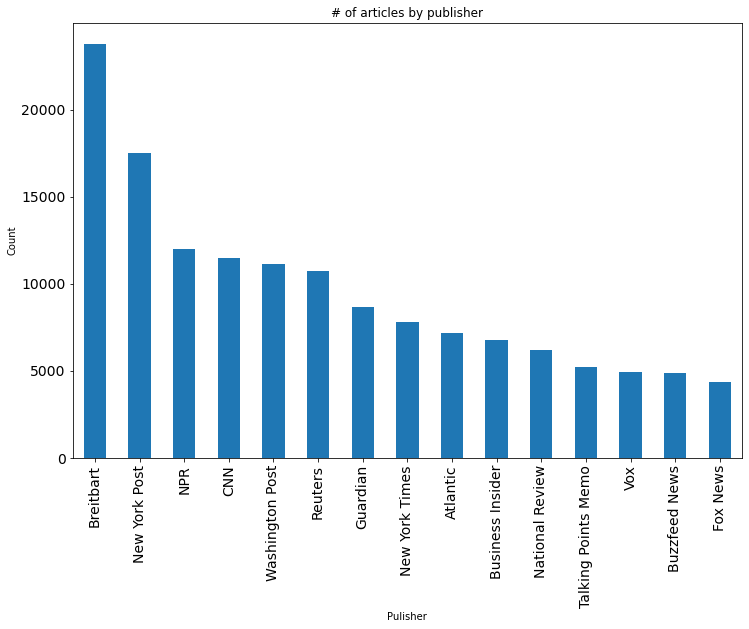

In [9]:
# Number of articles by publisher
ax = df['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8))
ax.set_title('# of articles by publisher')
ax.set_xlabel('Pulisher')
ax.set_ylabel('Count')

In [5]:
# Extract every articles that contain either nasdaq|s&p 500|dow jone|tsx. Then change every word to lower case.
df3 = df.astype(str).apply(lambda x: x.str.lower())
df3 = df3[df3.apply(lambda row: row.astype(str).str.contains('nasdaq|s&p 500|dow jones|tsx').any(), axis=1)]
df3.reset_index(inplace = True)

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        1312 non-null   int64 
 1   id           1312 non-null   object
 2   title        1312 non-null   object
 3   publication  1312 non-null   object
 4   author       1312 non-null   object
 5   date         1312 non-null   object
 6   year         1312 non-null   object
 7   month        1312 non-null   object
 8   url          1312 non-null   object
 9   content      1312 non-null   object
dtypes: int64(1), object(9)
memory usage: 102.6+ KB


In [32]:
df3.head()

,index,id,title,publication,date,content
0,119,17420,recovery finally yields big gains for average ...,new york times,2017-01-07,it has been a long time coming — eight year...
1,398,17735,run-up since election slows as investors consi...,new york times,2017-01-18,with just days to go before the inauguration o...
2,1087,18515,top wall street journal editor defends trump c...,new york times,2017-02-14,"gerard baker, the editor in chief of the wall ..."
3,1548,19022,stocks are up 5 percent under trump. so how lo...,new york times,2017-03-06,stocks have marched higher and higher — up ...
4,1549,19023,"donald trump, françois fillon, opel: your mond...",new york times,2017-03-06,good morning. here’s what you need to know: • ...


In [5]:
#Convert 'date' column to datetime datatype
df3['date'] = pd.to_datetime(df3['date'])

In [7]:
# The oldest and newest articles in dataset
print(df3['date'].min())
print(df3['date'].max())

2013-03-11 00:00:00
2017-07-03 00:00:00


Text(0, 0.5, 'Count')

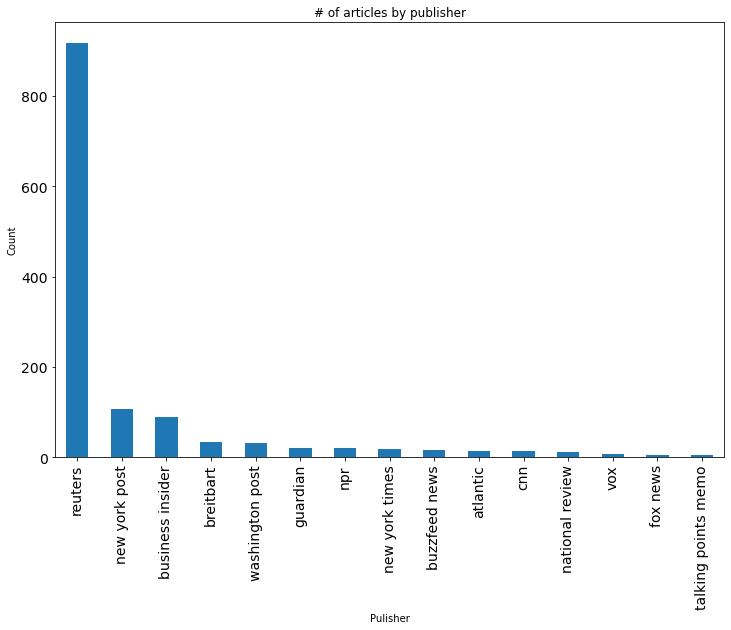

In [33]:
# Number of articles by publisher
ax = df3['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8))
ax.set_title('# of articles by publisher')
ax.set_xlabel('Pulisher')
ax.set_ylabel('Count')

In [34]:
df3.dtypes

index           int64
id             object
title          object
publication    object
date           object
content        object
dtype: object

In [35]:
# Number of articles by indexes
nasdaq = df3.apply(lambda row: row.astype(str).str.contains('nasdaq').any(), axis=1)
print(f"Number of articles that contains a word NASDAQ is {sum(nasdaq)}")
sp500 = df3.apply(lambda row: row.astype(str).str.contains('s&p 500').any(), axis=1)
print(f"Number of articles that contains a word S&P 500 is {sum(sp500)}")
dowjones = df3.apply(lambda row: row.astype(str).str.contains('dow jones').any(), axis=1)
print(f"Number of articles that contains a word Dow Jone is {sum(dowjone)}")
tsx = df3.apply(lambda row: row.astype(str).str.contains('tsx | toronto stock exchange').any(), axis=1)
print(f"Number of articles that contains a word TSX is {sum(tsx)}")

Number of articles that contains a word NASDAQ is 855
Number of articles that contains a word S&P 500 is 943
Number of articles that contains a word Dow Jone is 688
Number of articles that contains a word TSX is 3


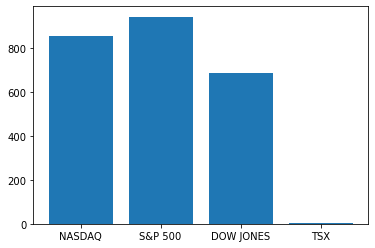

In [36]:
# Plotting the number of articles by indexes
x_list = ['NASDAQ', 'S&P 500', 'DOW JONES', 'TSX']
y_list = [sum(nasdaq), sum(sp500), sum(dowjone), sum(tsx)]
plt.bar(x_list, y_list)
plt.show()

Text(0, 0.5, 'Count')

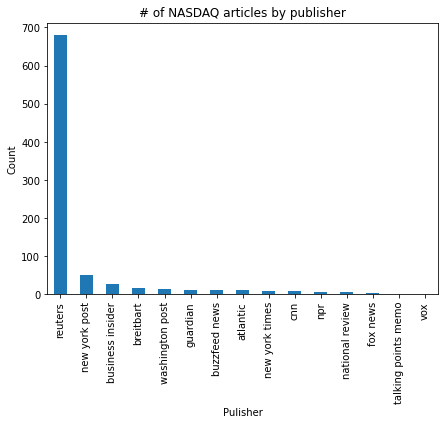

In [7]:
nasdaq_df = df3[df3.apply(lambda row: row.astype(str).str.contains('nasdaq').any(), axis=1)]
ax_nasdaq = nasdaq_df['publication'].value_counts().plot(kind='bar', figsize=(7,5))
ax_nasdaq.set_title('# of NASDAQ articles by publisher')
ax_nasdaq.set_xlabel('Pulisher')
ax_nasdaq.set_ylabel('Count')

Text(0, 0.5, 'Count')

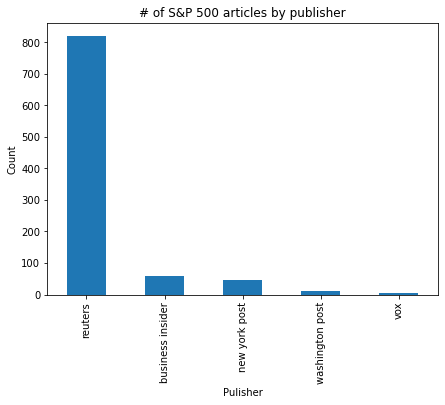

In [38]:
sp500_df = df3[df3.apply(lambda row: row.astype(str).str.contains('s&p 500').any(), axis=1)]
ax_sp500 = sp500_df['publication'].value_counts().plot(kind='bar', figsize=(7,5))
ax_sp500.set_title('# of S&P 500 articles by publisher')
ax_sp500.set_xlabel('Pulisher')
ax_sp500.set_ylabel('Count')

Text(0, 0.5, 'Count')

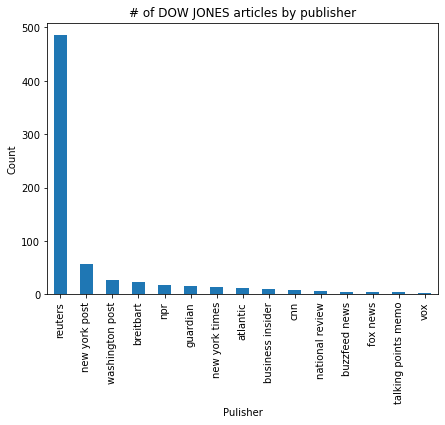

In [40]:
dowjones_df = df3[df3.apply(lambda row: row.astype(str).str.contains('dow jones').any(), axis=1)]
ax_dowjones = dowjone_df['publication'].value_counts().plot(kind='bar', figsize=(7,5))
ax_dowjones.set_title('# of DOW JONES articles by publisher')
ax_dowjones.set_xlabel('Pulisher')
ax_dowjones.set_ylabel('Count')

Text(0, 0.5, 'Count')

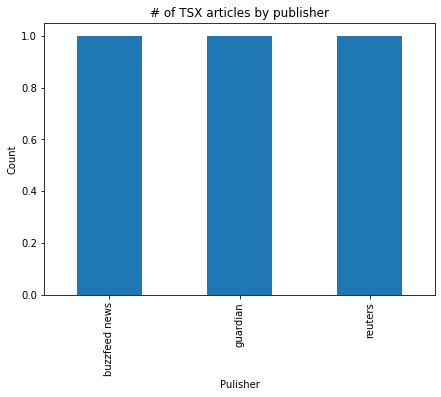

In [41]:
tsx_df = df3[df3.apply(lambda row: row.astype(str).str.contains('tsx | toronto stock exchange').any(), axis=1)]
ax_tsx = tsx_df['publication'].value_counts().plot(kind='bar', figsize=(7,5))
ax_tsx.set_title('# of TSX articles by publisher')
ax_tsx.set_xlabel('Pulisher')
ax_tsx.set_ylabel('Count')

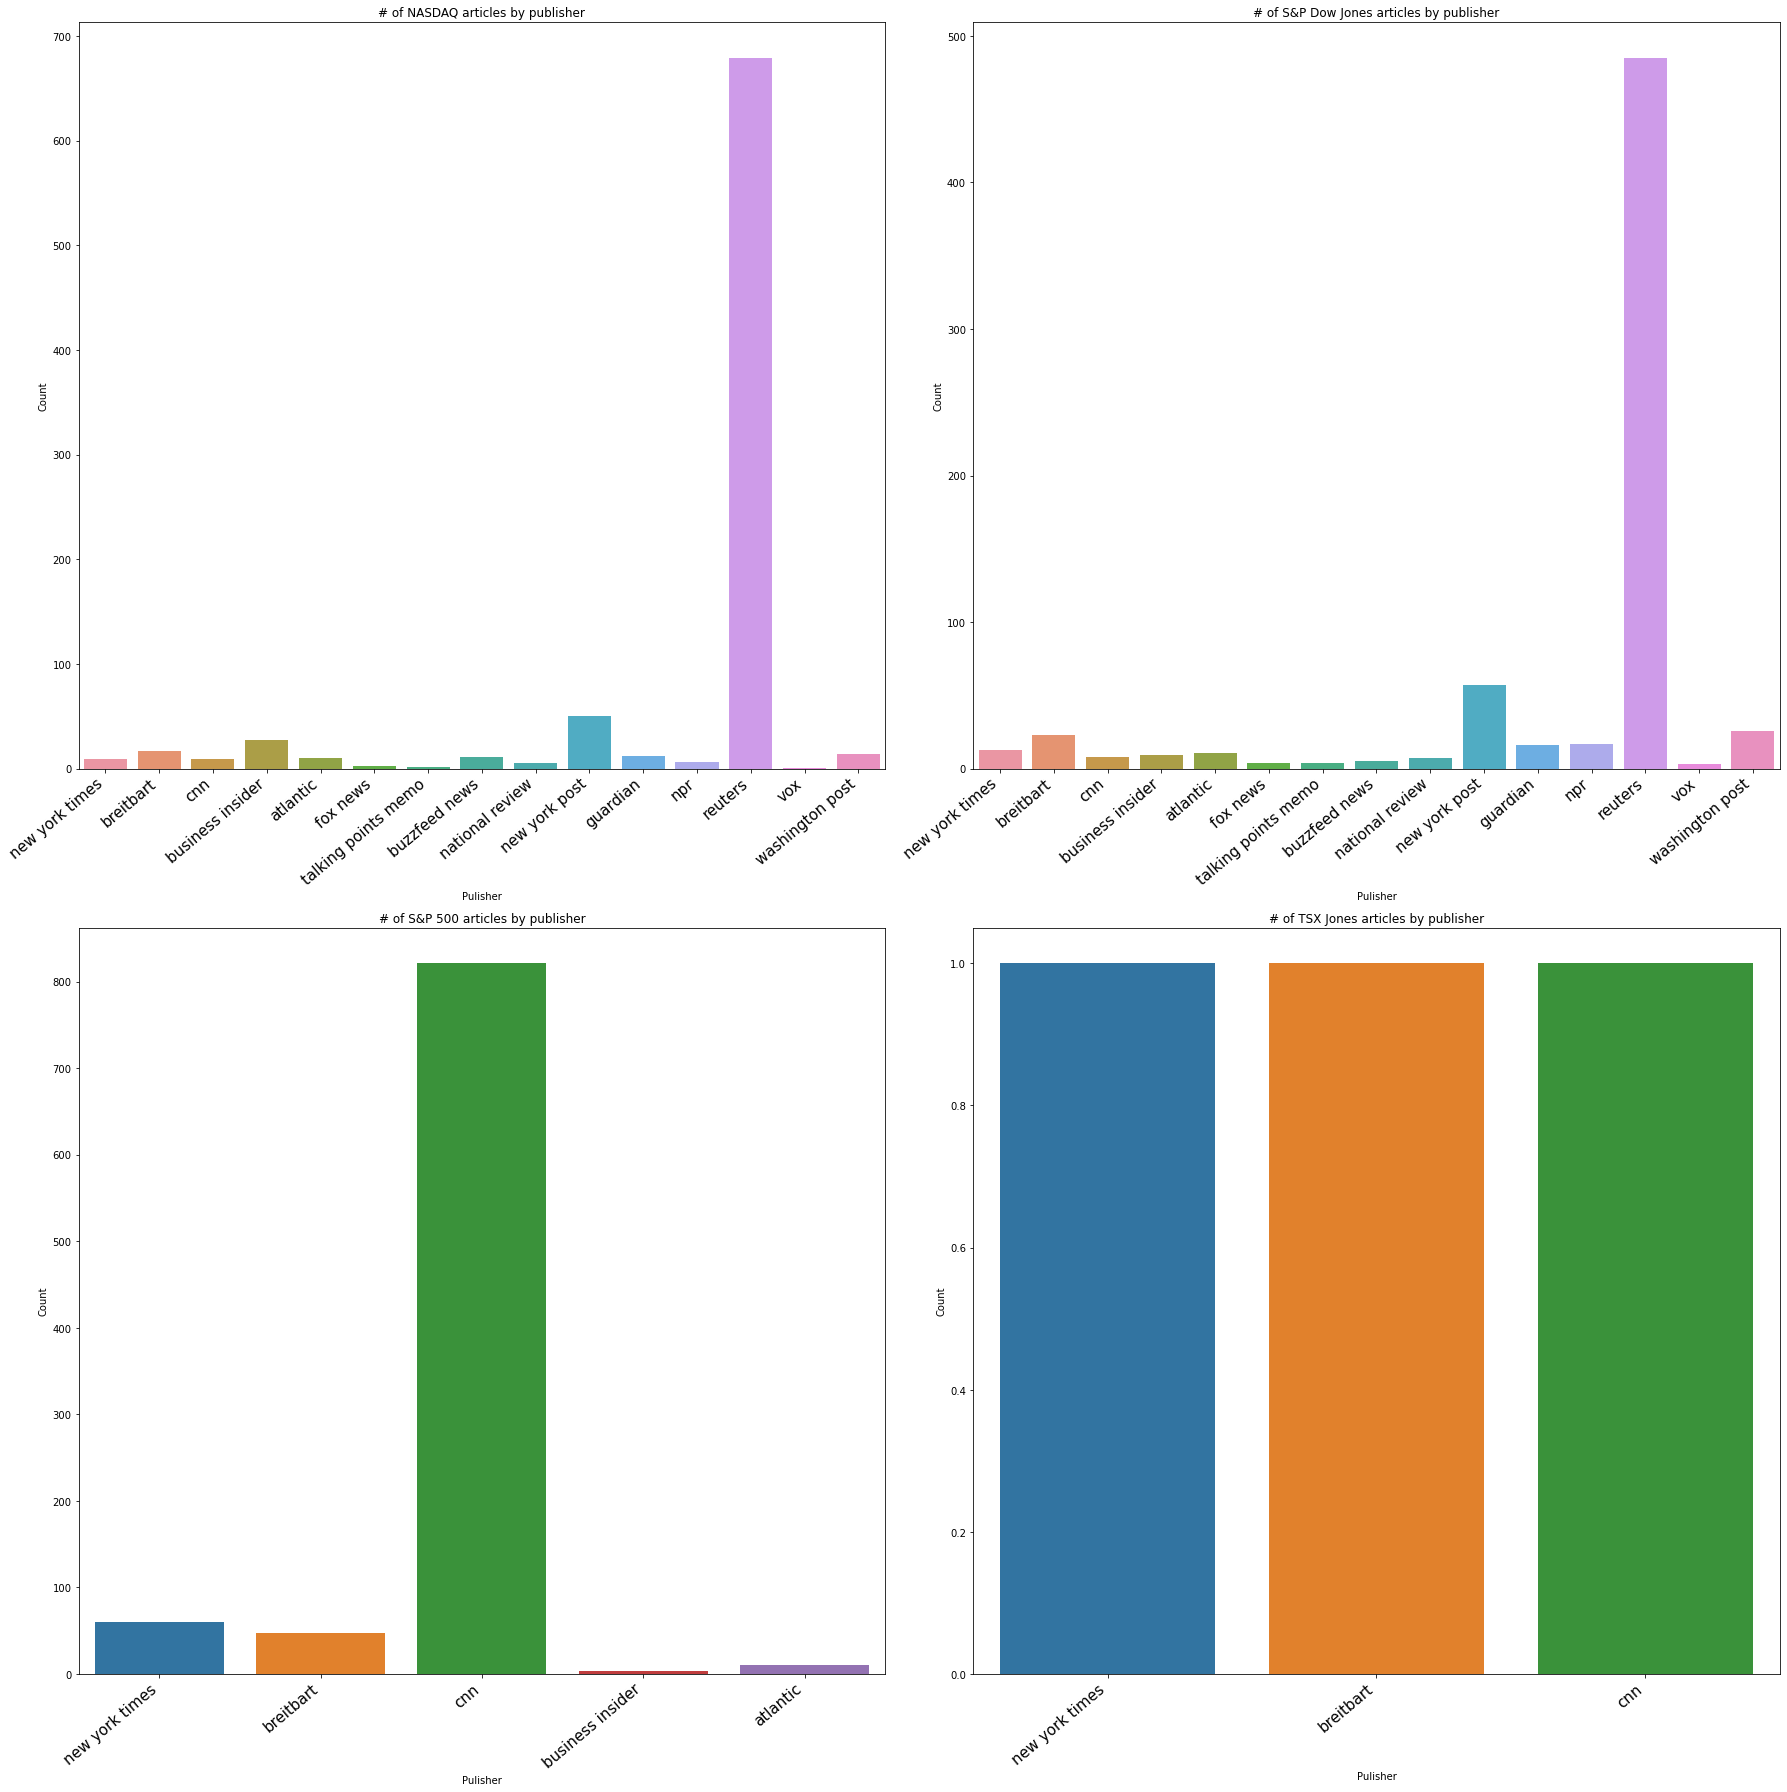

In [55]:
# Plotting number of pulisher by each index
nasdaq_df = df3[df3.apply(lambda row: row.astype(str).str.contains('nasdaq').any(), axis=1)]
sp500_df = df3[df3.apply(lambda row: row.astype(str).str.contains('s&p 500').any(), axis=1)]
dowjones_df = df3[df3.apply(lambda row: row.astype(str).str.contains('dow jones').any(), axis=1)]
tsx_df = df3[df3.apply(lambda row: row.astype(str).str.contains('tsx | toronto stock exchange').any(), axis=1)]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
axes = axes.flatten()
sns.countplot(x='publication', data=nasdaq_df, ax=axes[0])
axes[0].set_title('# of NASDAQ articles by publisher')
axes[0].set_xlabel('Pulisher')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15, rotation=40, ha="right")
sns.countplot(x='publication', data=sp500_df, ax=axes[2])
axes[2].set_title('# of S&P 500 articles by publisher')
axes[2].set_xlabel('Pulisher')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[0].get_xticklabels(), fontsize=15, rotation=40, ha="right")
sns.countplot(x='publication', data=dowjones_df, ax=axes[1])
axes[1].set_title('# of S&P Dow Jones articles by publisher')
axes[1].set_xlabel('Pulisher')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[0].get_xticklabels(), fontsize=15, rotation=40, ha="right")
sns.countplot(x='publication', data=tsx_df, ax=axes[3])
axes[3].set_title('# of TSX Jones articles by publisher')
axes[3].set_xlabel('Pulisher')
axes[3].set_ylabel('Count')
axes[3].set_xticklabels(axes[0].get_xticklabels(), fontsize=15, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [42]:
#Remove anything that is not a letter or space (note the ignoring of uppercase characters). Replace excessive spacing with a single one.
def clean(text):
    clean = re.sub("[^a-z\s]+", " ", text, flags=re.IGNORECASE)
    return re.sub("(\s+)", " ", clean)

In [43]:
df3['content'] = df3['content'].apply(lambda row: clean(row))

In [44]:
#Tokennizing
df3['tokenized'] = df3.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)

In [45]:
#Stemming
#Nearly universally regarded as an improvement over porter, and for good reason. Porter himself in fact admits that it is better than his original algorithm. Slightly faster computation time than porter, with a fairly large community around it.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [46]:
df3['stemmed'] = df3['tokenized'].apply(lambda row: [stemmer.stem(word) for word in row])

In [47]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [48]:
def lemmatize(col):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in col]

In [49]:
df3['content_lemmatized'] = df3['tokenized'].apply(lemmatize)

In [50]:
#Stop word removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
df3['stopwords'] = df3['stemmed'].apply(lambda row: [item for item in row if item not in stop])

In [51]:
df3['stopwords_joined'] = df3['stopwords'].apply(lambda x: ' '.join(x))

In [52]:
df3.head()

,index,id,title,publication,date,content,tokenized,stemmed,content_lemmatized,stopwords,stopwords_joined
0,119,17420,recovery finally yields big gains for average ...,new york times,2017-01-07,it has been a long time coming eight years in ...,"[it, has, been, a, long, time, coming, eight, ...","[it, has, been, a, long, time, come, eight, ye...","[it, ha, been, a, long, time, coming, eight, y...","[long, time, come, eight, year, fact, econom, ...",long time come eight year fact econom recoveri...
1,398,17735,run-up since election slows as investors consi...,new york times,2017-01-18,with just days to go before the inauguration o...,"[with, just, days, to, go, before, the, inaugu...","[with, just, day, to, go, befor, the, inaugur,...","[with, just, day, to, go, before, the, inaugur...","[day, go, befor, inaugur, donald, j, trump, pr...",day go befor inaugur donald j trump presid onc...
2,1087,18515,top wall street journal editor defends trump c...,new york times,2017-02-14,gerard baker the editor in chief of the wall s...,"[gerard, baker, the, editor, in, chief, of, th...","[gerard, baker, the, editor, in, chief, of, th...","[gerard, baker, the, editor, in, chief, of, th...","[gerard, baker, editor, chief, wall, street, j...",gerard baker editor chief wall street journal ...
3,1548,19022,stocks are up 5 percent under trump. so how lo...,new york times,2017-03-06,stocks have marched higher and higher up perce...,"[stocks, have, marched, higher, and, higher, u...","[stock, have, march, higher, and, higher, up, ...","[stock, have, marched, higher, and, higher, up...","[stock, march, higher, higher, percent, sinc, ...",stock march higher higher percent sinc presid ...
4,1549,19023,"donald trump, françois fillon, opel: your mond...",new york times,2017-03-06,good morning here s what you need to know pres...,"[good, morning, here, s, what, you, need, to, ...","[good, morn, here, s, what, you, need, to, kno...","[good, morning, here, s, what, you, need, to, ...","[good, morn, need, know, presid, trump, demand...",good morn need know presid trump demand congre...
